# Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

import pandas as pd
import os

file_path = '/content/drive/MyDrive/NNDL_HW2/HW2_Dataset/Train/'
file1_path = '/content/drive/MyDrive/NNDL_HW2_After_Augment/'
# file2_path = '/content/drive/MyDrive/NNDL_HW2/HW2_Dataset/Train/Dogs'

files1 = [f for f in os.listdir(file1_path) if os.path.isfile(os.path.join(file1_path, f))]


# print(f"Number of files in {file1_path} Before Augmentation : {len(files1)}")
# print(f"Number of files in {file2_path} Before Augmentation : {len(files2)}")
print('-----------------------------------------------')

all_train_path = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train'
train_path1 = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train/Cats/'
train_path2 = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train/Dogs/'

all_test_path = '/content/drive/MyDrive/NNDL_HW2_Before_Augmentation/HW2_Dataset/Test/'

train_files1 = [f for f in os.listdir(train_path1) if os.path.isfile(os.path.join(train_path1, f))]
train_files2 = [f for f in os.listdir(train_path2) if os.path.isfile(os.path.join(train_path2, f))]

# all_train_files = [f for f in os.listdir(all_train_path) if os.path.isfile(os.path.join(all_train_path, f))]
print(f'Number of files in {all_train_path} are : {len(train_files1) + len(train_files2)}') # 2106

print('---------------------------------------------------------------------------')

test_path = '/content/drive/MyDrive/NNDL_HW2_Before_Augmentation/HW2_Dataset/Test/Cats'
test_path2 = '/content/drive/MyDrive/NNDL_HW2_Before_Augmentation/HW2_Dataset/Test/Dogs'

files2 = [f for f in os.listdir(test_path2) if os.path.isfile(os.path.join(test_path2, f))]
files3 = [f for f in os.listdir(test_path)  if os.path.isfile(os.path.join(test_path, f))]
print(f"Number of files in {test_path} are : {len(files2) + len(files3)}")
# df.head()

Mounted at /content/drive
-----------------------------------------------
Number of files in /content/drive/MyDrive/NNDL_HW2_After_Augment/Train are : 2808
---------------------------------------------------------------------------
Number of files in /content/drive/MyDrive/NNDL_HW2_Before_Augmentation/HW2_Dataset/Test/Cats are : 100


# Transfering files into their correspond directory

In [ ]:
import os
import shutil

cat_path = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train/Cats'
dog_path = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train/Dogs'
train_path = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train'

# parent_dir = '/content/drive/MyDrive/NNDL_HW2_After_Augment/'
parent_dir_cats = '/content/drive/MyDrive/NNDL_HW2_Before_Augmentation/HW2_Dataset/Train/Cats/'
parent_dir_dogs = '/content/drive/MyDrive/NNDL_HW2_Before_Augmentation/HW2_Dataset/Train/Dogs/'

all_train_path = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train'
train_path1 = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train/Cats/'
train_path2 = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train/Dogs/'

parent_files_cats = [f for f in os.listdir(parent_dir_cats) if os.path.isfile(os.path.join(parent_dir_cats , f))]
parent_files_dogs = [f for f in os.listdir(parent_dir_dogs) if os.path.isfile(os.path.join(parent_dir_dogs , f))]

# Check if directories exist, create them if needed
# os.makedirs(cat_path, exist_ok=True)
# os.makedirs(dog_path, exist_ok =True)
# os.makedirs(train_path , exist_ok = True)

# for filename in parent_files_cats:
#   src = os.path.join(parent_dir_cats , filename)
#   dst = os.path.join(cat_path, filename)
#   # print(f'src : {src} \n')
#   # print(f'dst : {dst} \n')
#   # print('-----------------------')

#   shutil.move(src, dst)

# for filename in parent_files_dogs:
#   src = os.path.join(parent_dir_dogs , filename)
#   dst = os.path.join(dog_path, filename)
#   # print(f'src : {src} \n')
#   # print(f'dst : {dst} \n')
#   # print('-----------------------')

#   shutil.move(src, dst)



# Preprocessing and image augmentation

In [ ]:
from PIL import Image
import os
import random

file_path = '/content/drive/MyDrive/NNDL_HW2/HW2_Dataset/Train/'
file1_path = '/content/drive/MyDrive/NNDL_HW2/HW2_Dataset/Train/Cats'
file2_path = '/content/drive/MyDrive/NNDL_HW2/HW2_Dataset/Train/Dogs'

# Define the augmentation parameters
rotation_angle = 30
zoom_range = (0.75, 1.25)

# Function to perform image augmentation
def augment_image(image_path , save_path):
    image = Image.open(image_path)

    # Horizontal flipping
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    flipped_image.save(os.path.join(save_path, f"flipped_{os.path.basename(image_path)}"))

    # Rotation
    angle = random.randint(-rotation_angle, rotation_angle)
    rotated_image = image.rotate(angle)
    rotated_image.save(os.path.join(save_path, f"rotated_{os.path.basename(image_path)}"))

    # Scaling or zooming
    zoom_factor = random.uniform(zoom_range[0], zoom_range[1])
    scaled_image = image.resize((int(image.width * zoom_factor), int(image.height * zoom_factor)))
    scaled_image.save(os.path.join(save_path, f"scaled_{os.path.basename(image_path)}"))


# Iterate over all image files in the directory
for file_name in os.listdir(file1_path):
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        file_path = os.path.join(file1_path, file_name)
        augment_image(file_path, file1_path)

# Iterate over all image files in the directory
for file_name in os.listdir(file2_path):
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        file_path = os.path.join(file2_path, file_name)
        augment_image(file_path, file2_path)

files1 = [f for f in os.listdir(file1_path) if os.path.isfile(os.path.join(file1_path, f))]
files2 = [f for f in os.listdir(file2_path) if os.path.isfile(os.path.join(file2_path, f))]

print(f"Number of files in {file1_path} After Augmentation : {len(files1)}")
print(f"Number of files in {file2_path} After Augmentation : {len(files2)}")
print('-----------------------------------------------')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/NNDL_HW2/HW2_Dataset/Train/Cats'

# VGG16 Network

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define hyperparameters
# initial_lr = 0.001
# lr_decay_rate = 0.1
# momentum = 0.9
# batch_size = 32
# epochs = 10

# # Load pre-trained VGG16 model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Replace the FC layers with new ones for binary classification (dog vs cat)
# x = Flatten()(base_model.output)
# output = Dense(2, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Freeze all layers except the new FC layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model
# opt = SGD(learning_rate = initial_lr, momentum=momentum)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# # Data augmentation for training images
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)

# train_generator = train_datagen.flow_from_directory(file_path ,
#                                                     target_size=(224, 224),
#                                                     batch_size=batch_size,
#                                                     class_mode='categorical')

# # Train the model
# model.fit(train_generator, epochs=epochs)

# # Unfreeze the last CONV block
# for layer in model.layers[:15]:
#     layer.trainable = False

# # Recompile the model to apply the changes
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model again to fine-tune the last CONV layer block
# model.fit(train_generator, epochs=epochs)

58889256/58889256 [==============================] - 0s 0us/step
Found 3231 images belonging to 2 classes.
Epoch 1/10
101/101 [==============================] - 2108s 21s/step - loss: 0.7326 - accuracy: 0.7481
Epoch 2/10
101/101 [==============================] - 2061s 20s/step - loss: 0.2422 - accuracy: 0.9003
Epoch 3/10
101/101 [==============================] - 2061s 20s/step - loss: 0.2081 - accuracy: 0.9124
Epoch 4/10
101/101 [==============================] - 2060s 20s/step - loss: 0.1580 - accuracy: 0.9366
Epoch 5/10
101/101 [==============================] - 2061s 20s/step - loss: 0.1327 - accuracy: 0.9508
Epoch 6/10
101/101 [==============================] - 2058s 20s/step - loss: 0.1167 - accuracy: 0.9573
Epoch 7/10
 63/101 [=================>............] - ETA: 12:58 - loss: 0.1418 - accuracy: 0.9439

KeyboardInterrupt: 

# VGG16 - With Validation Set

58889256/58889256 [==============================] - 0s 0us/step
Found 2247 images belonging to 2 classes.
Found 561 images belonging to 2 classes.
Epoch 1/50
225/225 [==============================] - 477s 2s/step - loss: 151.2081 - accuracy: 0.6960 - val_loss: 183.8861 - val_accuracy: 0.7094
Epoch 2/50
225/225 [==============================] - 49s 220ms/step - loss: 98.3138 - accuracy: 0.8202 - val_loss: 20.2335 - val_accuracy: 0.9287
Epoch 3/50
225/225 [==============================] - 49s 217ms/step - loss: 41.6424 - accuracy: 0.8901 - val_loss: 20.4614 - val_accuracy: 0.9251
Epoch 4/50
225/225 [==============================] - 48s 212ms/step - loss: 52.6546 - accuracy: 0.8700 - val_loss: 59.2430 - val_accuracy: 0.8378
Epoch 5/50
225/225 [==============================] - 51s 225ms/step - loss: 46.7955 - accuracy: 0.8834 - val_loss: 7.0100 - val_accuracy: 0.9697
Epoch 6/50
225/225 [==============================] - 51s 225ms/step - loss: 55.2588 - accuracy: 0.8821 - val_loss: 12

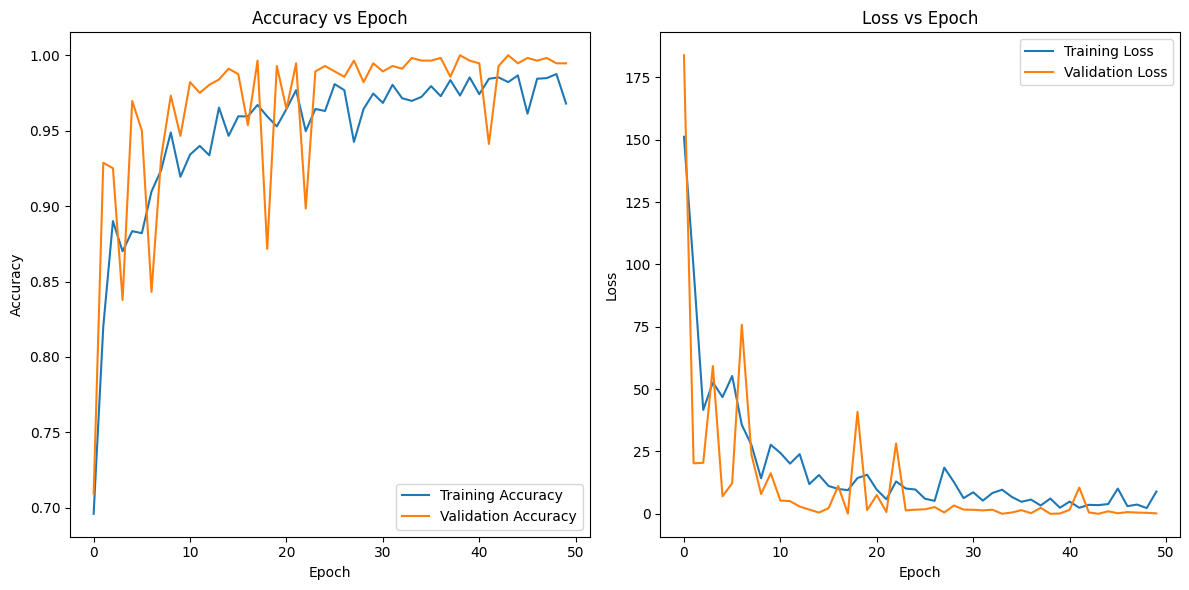

Found 100 images belonging to 2 classes.
10/10 [==============================] - 21s 2s/step - loss: 63.5317 - accuracy: 0.8700


[63.53165054321289, 0.8700000047683716]

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define hyperparameters
initial_lr = 0.1
lr_decay_rate = 0.002
momentum = 0.9
batch_size = 10
epochs = 50

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace the FC layers with new ones for binary classification (dog vs cat)
x = Flatten()(base_model.output)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze all layers except the new FC layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
opt = SGD(learning_rate=initial_lr, momentum=momentum)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for training images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # Splitting the dataset into training and validation

all_train_path = '/content/drive/MyDrive/NNDL_HW2_After_Augment/Train/'
all_test_path = '/content/drive/MyDrive/NNDL_HW2_Before_Augmentation/HW2_Dataset/Test/'

train_generator = train_datagen.flow_from_directory(all_train_path,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')  # Training set

validation_generator = train_datagen.flow_from_directory(all_train_path,
                                                         target_size=(224, 224),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation')  # Validation set

# Train the model with training and validation data
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plotting the graph of accuracy and loss based on epoch number
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Unfreeze the last CONV block
for layer in model.layers[:15]:
    layer.trainable = False

# Recompile the model to apply the changes
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Test data generator for evaluation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(all_test_path ,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Evaluate the model on the test set
model.evaluate(test_generator)